Tokenizing


By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

Tokenizing by word: 

Words are like the atoms of natural language. They’re the smallest unit of meaning that still makes sense on its own. Tokenizing your text by word allows you to identify words that come up particularly often. For example, if you were analyzing a group of job ads, then you might find that the word “Python” comes up often. That could suggest high demand for Python knowledge, but you’d need to look deeper to know more.

Tokenizing by sentence: 

When you tokenize by sentence, you can analyze how those words relate to one another and see more context. Are there a lot of negative words around the word “Python” because the hiring manager doesn’t like Python? Are there more terms from the domain of herpetology than the domain of software development, suggesting that you may be dealing with an entirely different kind of python than you were expecting?

Here’s how to import the relevant parts of NLTK so you can tokenize by word and by sentence:

In [58]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [59]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

In [60]:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [61]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

See how "It's" was split at the apostrophe to give you 'It' and "'s", but "Muad'Dib" was left whole? This happened because NLTK knows that 'It' and "'s" (a contraction of “is”) are two distinct words, so it counted them separately. But "Muad'Dib" isn’t an accepted contraction like "It's", so it wasn’t read as two separate words and was left intact.

In [62]:
from nltk.corpus import stopwords

In [63]:
worf_quote = "Sir, I protest. I am not a merry man!"

Stemming


Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has more than one stemmer, but you’ll be using the Porter stemmer.

In [64]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [65]:
stemmer = PorterStemmer()

In [66]:
string_for_stemming = """
The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

In [67]:
words = word_tokenize(string_for_stemming)

In [68]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [69]:
stemmed_words = [stemmer.stem(word) for word in words]

In [70]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Understemming and overstemming are two ways stemming can go wrong:

1. Understemming happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
2. Overstemming happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.

Tagging Parts of Speech (pos)

In [71]:
sagan_quote = """
If you wish to make an apple pie from scratch,
you must first invent the universe."""

In [72]:
words_in_sagan_quote = word_tokenize(sagan_quote)

In [73]:
import nltk

nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [74]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [75]:
jabberwocky_excerpt = """
'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
all mimsy were the borogoves, and the mome raths outgrabe."""

In [76]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

In [77]:
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Lemmatizing

Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word

In [78]:
from nltk.stem import WordNetLemmatizer

In [79]:
lemmatizer = WordNetLemmatizer()

In [80]:
lemmatizer.lemmatize("scarves")

'scarf'

In [81]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

In [82]:
words = word_tokenize(string_for_lemmatizing)

In [83]:
words

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']

In [84]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [85]:
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

In [86]:
lemmatizer.lemmatize("worst")

'worst'

In [87]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

Chunking

While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.

In [88]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [89]:
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

In [90]:
nltk.download("averaged_perceptron_tagger")
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Citrusbug
[nltk_data]     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

Create a chunk grammar with one regular expression rule:

In [91]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

In [92]:
chunk_parser = nltk.RegexpParser(grammar)

In [93]:
tree = chunk_parser.parse(lotr_pos_tags)

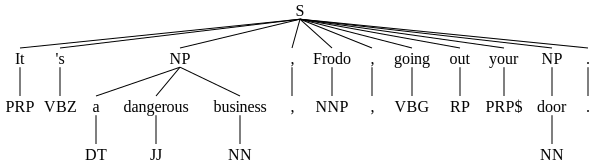

In [94]:
tree

Chinking

Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

In [95]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

The next step is to create a grammar to determine what you want to include and exclude in your chunks. This time, you’re going to use more than one line because you’re going to have more than one rule. Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):

In [96]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""

In [97]:
chunk_parser = nltk.RegexpParser(grammar)

In [98]:
tree = chunk_parser.parse(lotr_pos_tags)

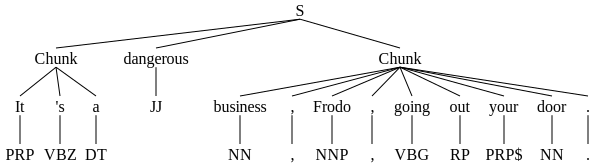

In [99]:
tree

Using Named Entity Recognition (NER)


Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are.

In [100]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(lotr_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Citrusbug
[nltk_data]     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Citrusbug
[nltk_data]     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


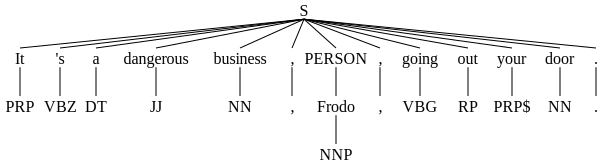

In [101]:
tree

See how Frodo has been tagged as a PERSON? You also have the option to use the parameter binary=True if you just want to know what the named entities are but not what kind of named entity they are:

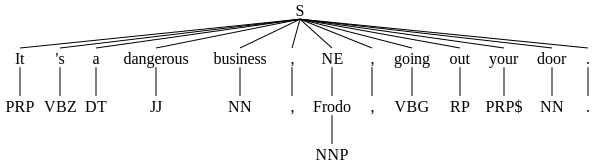

In [102]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
tree

That’s how you can identify named entities! But you can take this one step further and extract named entities directly from your text. Create a string from which to extract named entities. You can use this quote from The War of the Worlds:

In [103]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

In [104]:
def extract_ne(quote):
    words = word_tokenize(quote)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

In [105]:
extract_ne(quote=quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

Getting Text to Analyze


Now that you’ve done some text processing tasks with small example texts, you’re ready to analyze a bunch of texts at once. A group of texts is called a corpus. NLTK provides several corpora covering everything from novels hosted by Project Gutenberg to inaugural speeches by presidents of the United States.

In [106]:
from nltk.book import *

nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Citrusbug
[nltk_data]    |     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Citrusbug
[nltk_data]    |     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to C:\Users\Citrusbug
[nltk_data]    |     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to C:\Users\Citrusbug
[nltk_data]    |     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to C:\Users\Citrusbug
[nltk_data]    |     Technolabs\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Dow

True

In [107]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [108]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


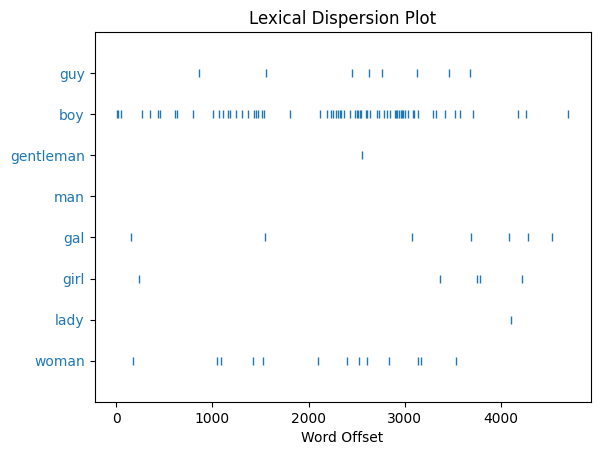

In [109]:
text8.dispersion_plot(
    ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]
)

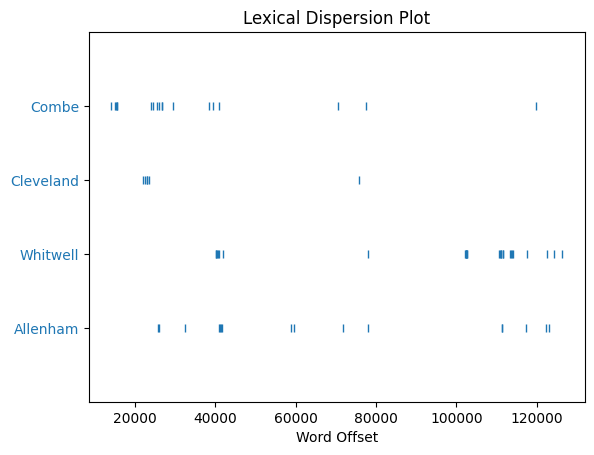

In [110]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

Making a Frequency Distribution

With a frequency distribution, you can check which words show up most frequently in your text. You’ll need to get started with an import:

In [111]:
from nltk import FreqDist

In [112]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


In [113]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

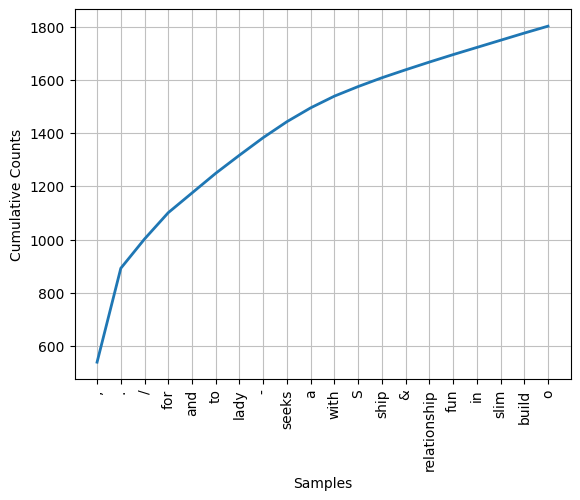

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [115]:
frequency_distribution.plot(20, cumulative=True)

Finding Collocations

A collocation is a sequence of words that shows up often. If you’re interested in common collocations in English, then you can check out The BBI Dictionary of English Word Combinations. It’s a handy reference you can use to help you make sure your writing is idiomatic. Here are some examples of collocations that use the word “tree”:

Syntax tree
Family tree
Decision tree

In [116]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
